In [160]:
#导包
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# 导入数据
train_data=pd.read_csv('train.csv')
print("训练集数据:\n")
train_data#数据一共有12行 因为没有行索引 所以采用的默认索引0开始

训练集数据:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [162]:
#看一下数据的分析
train_data.info()#一共891行数据 Age Cabin Embarked三行有数据缺失 探索一下数据 然后看填充策略

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
#看一下测试集的数据
test_data=pd.read_csv('test.csv')
print("测试数据:\n")
test_data

测试数据:



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [164]:
test_data.info()#同样也是Age Cabin Embarked缺失 Fare中也有一个缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [165]:
#先做测试集的数据填充吧 
#看一下数据集的分布情况
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

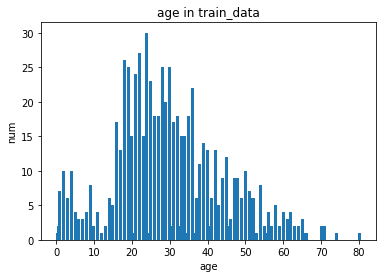

In [166]:
#做一下直方图的可视化
plt.bar(train_data['Age'].value_counts().index,train_data['Age'].value_counts().values)#横轴是年龄的值，纵轴是年龄的数量
plt.title("age in train_data")
plt.xlabel("age")
plt.ylabel("num")
plt.show()

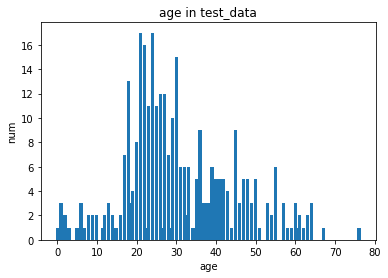

In [167]:
#同理做一下测试集中的age可视化
plt.bar(test_data['Age'].value_counts().index,test_data['Age'].value_counts().values)#横轴是年龄的值，纵轴是年龄的数量
plt.title("age in test_data")
plt.xlabel("age")
plt.ylabel("num")
plt.show()#观察好了数据之后 发现数据age这种数据最好用平局填充吧

In [168]:
#开始用age的均值来填充数据
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
train_data['Age'].isnull().any()#train_data的Age这一列已经没有缺失值了  

False

In [169]:
#同理测试集也处理一下
test_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_data['Age'].isnull().any()#test_data的Age这一列已经没有缺失值了  

False

In [170]:
#测试集中的Fare有一个缺失值 先看一下测试集中的Fare的数据分布情况
test_data['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

看下data['Fare']里面的统计之后有哪些值： [7.75, 26.0, 8.05, 13.0, 7.8958, 10.5, 7.775, 7.2292, 7.225, 8.6625, 7.8542, 21.0, 26.55, 7.8792, 27.7208, 7.25, 7.925, 262.375, 211.5, 69.55, 14.5, 7.55, 7.7958, 15.2458, 55.4417, 31.3875, 31.5, 14.4542, 9.5, 221.7792, 39.0, 134.5, 16.1, 23.0, 65.0, 13.775, 13.5, 59.4, 7.7333, 83.1583, 7.05, 29.7, 20.575, 46.9, 263.0, 164.8667, 75.2417, 13.9, 151.55, 12.1833, 11.5, 0.0, 73.5, 15.5, 32.5, 36.75, 6.4375, 60.0, 57.75, 93.5, 7.0, 22.525, 15.0458, 22.025, 12.35, 7.65, 51.8625, 13.8583, 136.7792, 79.2, 23.45, 82.2667, 21.6792, 81.8583, 42.5, 106.425, 3.1708, 8.1125, 50.0, 27.4458, 15.9, 31.6833, 61.9792, 12.2875, 45.5, 52.5542, 30.0, 27.75, 16.0, 10.7083, 13.4167, 211.3375, 15.7417, 8.7125, 16.7, 9.6875, 29.0, 7.8292, 15.55, 30.5, 71.2833, 15.1, 135.6333, 512.3292, 8.9625, 29.125, 20.25, 12.7375, 61.3792, 52.0, 15.75, 42.4, 7.8208, 23.25, 56.4958, 28.5, 18.0, 12.875, 31.6792, 90.0, 51.4792, 24.15, 15.5792, 7.7792, 7.2833, 25.7417, 37.0042, 14.1083, 25.7, 146.5208,

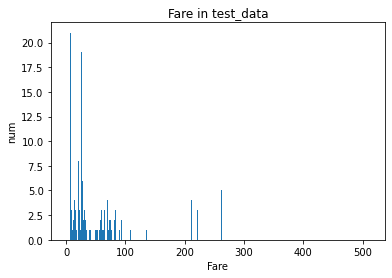

In [171]:
print("看下data['Fare']里面的统计之后有哪些值：",test_data['Fare'].value_counts().index.tolist())
#同理做一下可视化
plt.bar(test_data['Fare'].value_counts().index,test_data['Fare'].value_counts().values)#横轴是Fare的值，纵轴是Fare的数量
plt.title("Fare in test_data")
plt.xlabel("Fare")
plt.ylabel("num")
plt.show()#感觉这一行的数据用众数填充充吧  毕竟是票价 就那几个票价

In [172]:
print(test_data['Fare'].mode(),type(test_data['Fare'].mode()))#注意这里用众数填充 mode()之后是个serise 
test_data['Fare'].fillna(test_data['Fare'].mode()[0],inplace=True)#要mode()[0]才能拿到具体的数字 否则这里填充不了
test_data['Fare'].isnull().sum()#test_data的Age这一列已经没有缺失值了  

0    7.75
dtype: float64 <class 'pandas.core.series.Series'>


0

In [173]:
#训练集和测试集中的 Cabin 都有确实 需要填充  
#还是看下数据的分布
print('看一下有多少缺失值:',train_data['Cabin'].isnull().sum())
train_data['Cabin'].value_counts()  #缺失值太多 直接删除吧 而且分布很杂乱 类别太多

看一下有多少缺失值: 687


G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F33            3
              ..
D28            1
B37            1
F G63          1
D6             1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [174]:
train_data=train_data.drop(columns = ['Cabin'])
test_data=test_data.drop(columns = ['Cabin'])#删除操作

In [175]:
#删除之后看看
train_data #已经没有Cabin那一列了

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [176]:
test_data#Cabin那一列确实删除了   测试集比训练集少了一个Survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,S


In [177]:
#训练集 Embarked 要用众数填充一下 有两个缺失值
print(train_data['Embarked'].isnull().sum())

2


In [178]:
#看一下数据分布
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

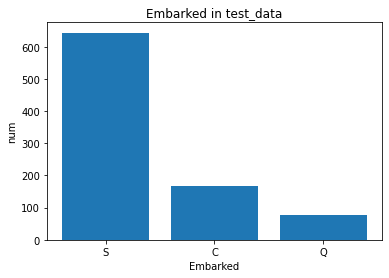

In [179]:
#可视化一下
#同理做一下可视化
plt.bar(train_data['Embarked'].value_counts().index,train_data['Embarked'].value_counts().values)#横轴是Fare的值，纵轴是Fare的数量
plt.title("Embarked in test_data")
plt.xlabel("Embarked")
plt.ylabel("num")
plt.show()#感觉这一行的数据用众数填充充吧  毕竟是票价 就那几个票价

In [180]:
#用众数填充一下
print(train_data['Embarked'].mode(),type(train_data['Embarked'].mode()))#注意这里用众数填充 mode()之后是个serise 
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)#要mode()[0]才能拿到具体的数字 否则这里填充不了
train_data['Embarked'].isnull().sum()#test_data的Age这一列已经没有缺失值了  

0    S
dtype: object <class 'pandas.core.series.Series'>


0

In [181]:
#以上算是完成了数据清洗和填充  然后来检查一下 是否还有缺失的情况
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [182]:
test_data.info()#训练集和测试集都没有缺失值了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [183]:
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']#选择了这7个特征   一共11行
train_features = train_data[features]#PassengerId   Name Ticket  这三个没有选 因为意义感觉不是很大         
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [184]:
type(train_features.Embarked.str.get_dummies())

pandas.core.frame.DataFrame

In [185]:
train_features.Embarked.str.get_dummies()#将 Embarked 这列特征ont-hot编码处理一下

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [186]:
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [187]:
train_data_hot_encoded=train_features.drop('Embarked',1)#Embarked 这一列删除了 
train_data_hot_encoded

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000
887,1,female,19.000000,0,0,30.0000
888,3,female,29.699118,1,2,23.4500
889,1,male,26.000000,0,0,30.0000


In [188]:
train_data_hot_encoded=train_data_hot_encoded.join(train_features.Embarked.str.get_dummies())#这样就把Embarked 登陆港口由字母转换成了one-hot
train_data_hot_encoded

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,male,22.000000,1,0,7.2500,0,0,1
1,1,female,38.000000,1,0,71.2833,1,0,0
2,3,female,26.000000,0,0,7.9250,0,0,1
3,1,female,35.000000,1,0,53.1000,0,0,1
4,3,male,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,0,0,1
887,1,female,19.000000,0,0,30.0000,0,0,1
888,3,female,29.699118,1,2,23.4500,0,0,1
889,1,male,26.000000,0,0,30.0000,1,0,0


In [189]:
#同理 sex这一列  也经过同样的转换  不过一部到位
train_data_hot_encoded=train_data_hot_encoded.drop('Sex',1).join( train_data_hot_encoded['Sex'].str.get_dummies() )
train_data_hot_encoded#这样算是完成了特征的选择 以及 特征的抽取  都是数字类型 可以用计算机算法来转换

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,35.000000,1,0,53.1000,0,0,1,1,0
4,3,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1,1,0
888,3,29.699118,1,2,23.4500,0,0,1,1,0
889,1,26.000000,0,0,30.0000,1,0,0,0,1


In [190]:
#看一下特征之间的相关程度
train_data_hot_encoded.corr()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.131900,0.131900
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336,-0.084153,0.084153
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.114631,-0.114631
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.245489,-0.245489
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.182333,-0.182333
C,-0.243292,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.082853,-0.082853
Q,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.074115,-0.074115
S,0.074053,-0.019336,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.119224,0.119224
female,-0.131900,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224,1.000000,-1.000000
male,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224,-1.000000,1.000000


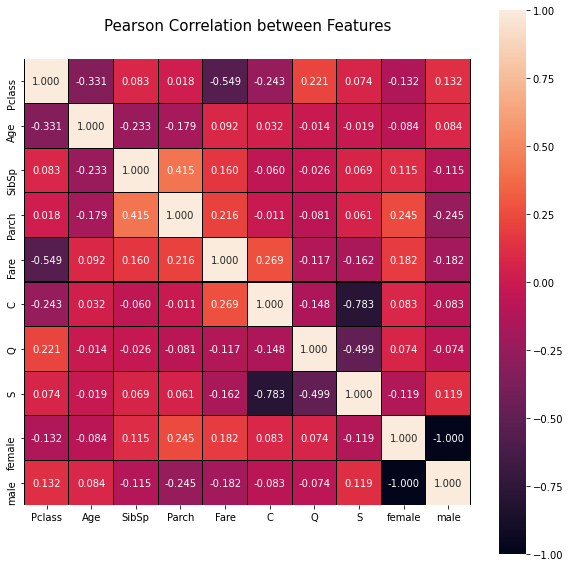

In [191]:
#可视化一下
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation between Features',y=1.05,size=15)#y=0.5 标题就在正中间  y=2的时候 标题跟图之间空了一大格 size表示字体大小
sns.heatmap(train_data_hot_encoded.corr(),linewidths=0.05,vmax=1, fmt= '.3f', square=True,linecolor='black',annot=True)
#linewidths=1 表示下图单元格之间的宽度 vmax=1 表示相关系数最大为1  fmt表示小数点位数  square表示格子是否严格的正方形 
#linecolor表示相邻空格的那个分界线的颜色  annot=False了以后  放个里面就没有数字了 只有颜色
plt.show()

In [192]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

sizes: [549, 342]


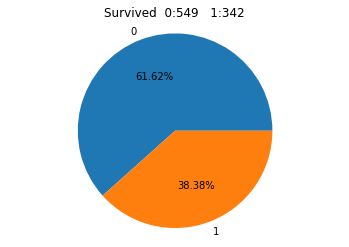

In [193]:
sizes=[train_data["Survived"].value_counts().values[0],train_data["Survived"].value_counts().values[1]]
print('sizes:',sizes)
# 使用饼图来进行Survived取值的可视化
plt.pie(sizes,
        labels=[0,1],
        autopct = '%3.2f%%', #数值保留固定小数位
        ) #数值距圆心半径倍数距离
plt.title("Survived  "+"0:"+str(train_data["Survived"].value_counts().values[0])+'   1:'+str(train_data["Survived"].value_counts().values[1]))
plt.axis('equal')
plt.show()

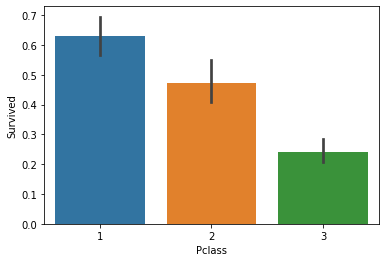

In [194]:
# 不同的Pclass,幸存人数(条形图)
sns.barplot(x = 'Pclass', y = "Survived", data = train_data);#用seaborns+dataframe的方式真的比 matploylib省很多代码
plt.show()

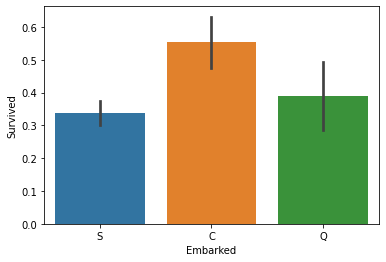

In [195]:
# 不同的Embarked,幸存人数(条形图)
sns.barplot(x = 'Embarked', y = "Survived", data = train_data);#这样轻松的可以得到 某个特征中 标签不同类别的分布情况
plt.show()

In [196]:
# 开始用决策树训练 并得到重要性
from sklearn.tree import DecisionTreeClassifier

# 构造CART决策树
clf = DecisionTreeClassifier()
# 决策树训练
clf.fit(train_data_hot_encoded, train_data['Survived'])
# 显示特征向量的重要程度
coeffs = clf.feature_importances_
print("特征向量的重要程度:",coeffs,type(coeffs))

特征向量的重要程度: [0.11066467 0.24550819 0.050182   0.03175385 0.23235552 0.00669015
 0.00580088 0.00770955 0.         0.30933519] <class 'numpy.ndarray'>


In [198]:
train_data_hot_encoded#10个特征

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,35.000000,1,0,53.1000,0,0,1,1,0
4,3,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1,1,0
888,3,29.699118,1,2,23.4500,0,0,1,1,0
889,1,26.000000,0,0,30.0000,1,0,0,0,1


In [199]:
df_co = pd.DataFrame(coeffs, columns=["importance_"])
df_co

,importance_
0,0.110665
1,0.245508
2,0.050182
3,0.031754
4,0.232356
5,0.006690
6,0.005801
7,0.007710
8,0.000000
9,0.309335


In [200]:
# 下标设置为Feature Name
df_co.index = train_data_hot_encoded.columns
df_co

,importance_
Pclass,0.110665
Age,0.245508
SibSp,0.050182
Parch,0.031754
Fare,0.232356
C,0.006690
Q,0.005801
S,0.007710
female,0.000000
male,0.309335


In [201]:
df_co.sort_values("importance_", ascending=True, inplace=True)#排序
df_co

,importance_
female,0.000000
Q,0.005801
C,0.006690
S,0.007710
Parch,0.031754
SibSp,0.050182
Pclass,0.110665
Fare,0.232356
Age,0.245508
male,0.309335


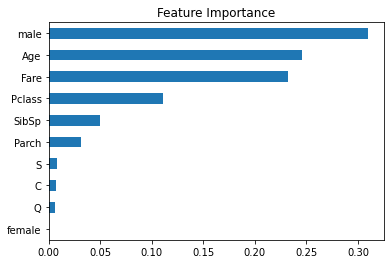

In [202]:
#可视化
df_co.importance_.plot(kind="barh")
plt.title("Feature Importance")
plt.show()